# Clustering

In this notebook, we will provide an overview over the training and analysis of the clustering algorithms.

In [1]:
import argparse
from pathlib import Path
import warnings

from clustering import Clustering

## Fetch the preprocessed data
To successfully run this notebook, you need to first run the `main.py` with 
`--args_path conf/args.yaml` flag. Make sure that the `preprocess : True` boolean
is set in the YAML file. After the preprocessing is done, you can run this notebook.

In [2]:
DATA_PROCESSED_DIR = Path('../../data/processed')

In [3]:
c = Clustering(args=argparse.Namespace(data_parsed=DATA_PROCESSED_DIR / 'data_parsed.csv'))

## PCA Dimensionality Reduction

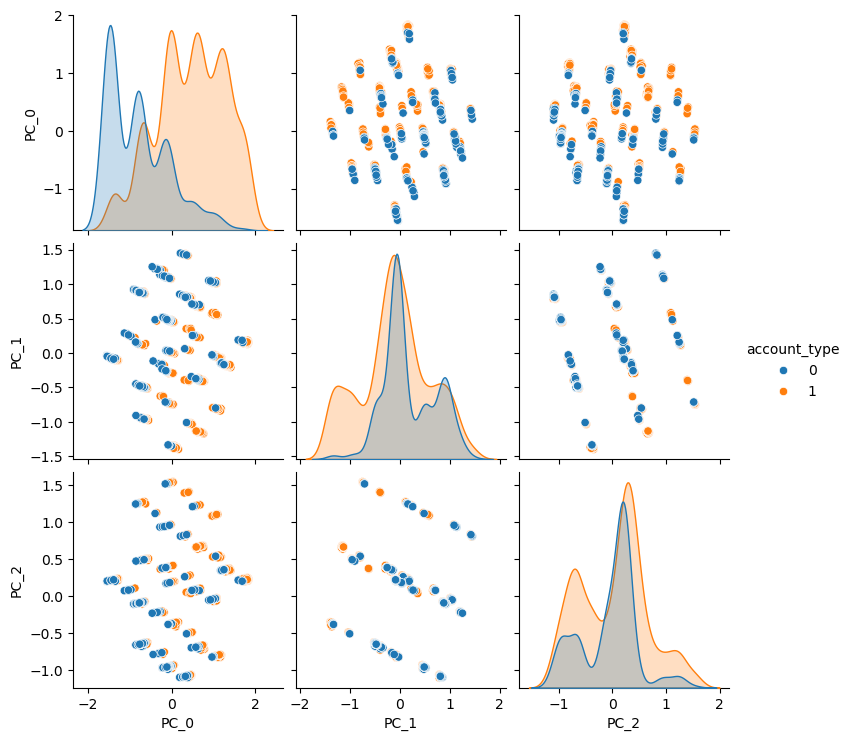

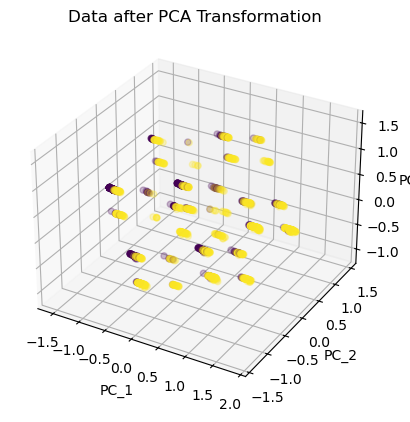

In [4]:
reduced_train = c.pca_dimensionality_reduction(c.train, 3)

## KMeans

Elbow method for determining the optimal number of clusters. The codebase has
k=8 hard-coded as its empirically determined to be the optimal number of clusters.

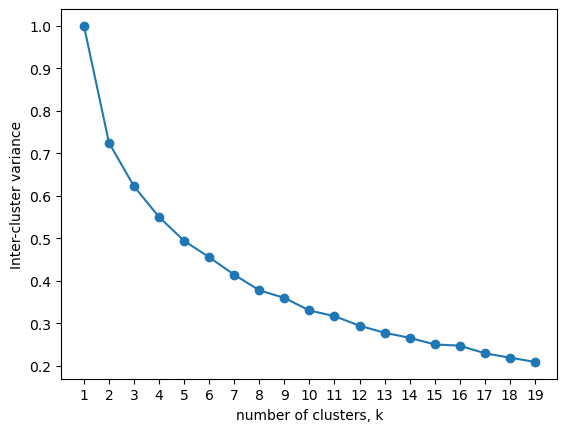

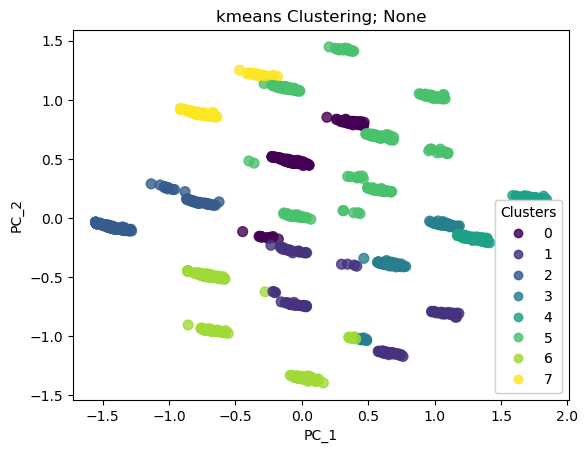

Adj. Mutual information score: 0.144
Homogeneity score: 0.297
Completeness score: 0.096
Silhouette score: 0.448


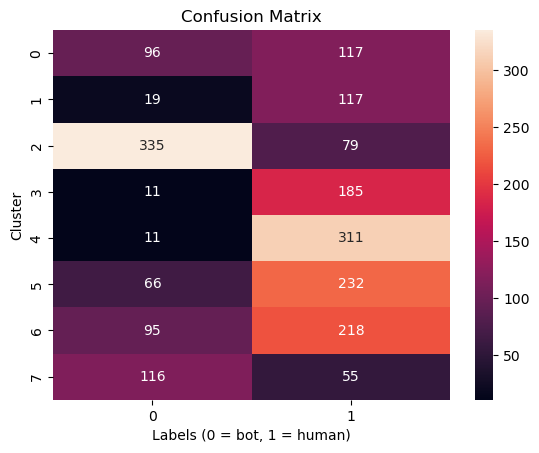

In [5]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")  # Ignore `n_init` warnings for a cleaner output
    
    c.perform_kmeans(reduced_train)

## DBSCAN

Similarly as with K-Means, we use the elbow method to determine the optimal
epsilon value. The codebase has epsilon=0.2 hard-coded as its empirically
determined to be the optimal value.

Based on methodology from https://www.khoury.northeastern.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf

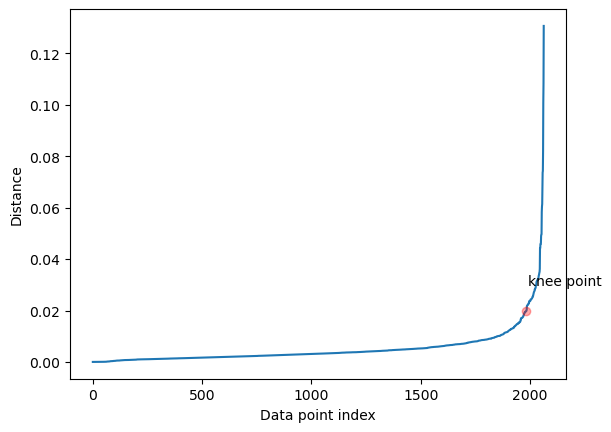

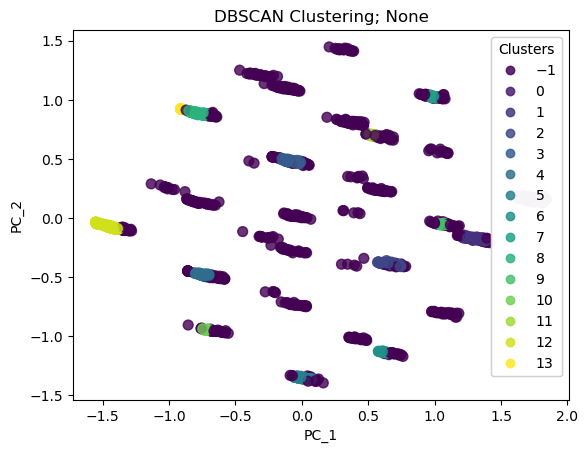

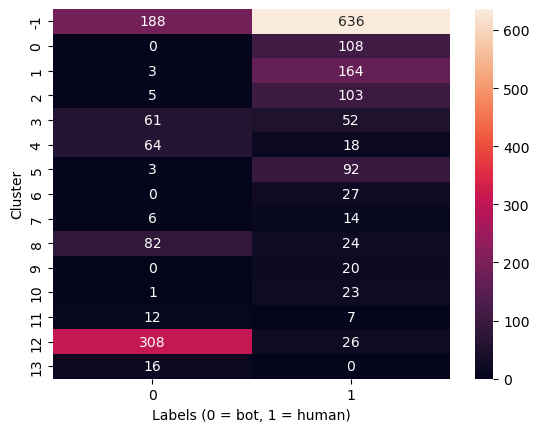

Adj. Mutual information score: 0.201
Homogeneity score: 0.416
Completeness score: 0.134
Silhouette score: 0.425


,PC_0,PC_1,PC_2,Cluster
0,0.420632,0.802679,-1.071288,-1
1,1.039792,-0.057564,-0.808444,9
2,0.933506,1.029707,-0.043832,-1
3,0.551590,0.691827,0.088375,-1
4,0.632749,0.683505,0.101794,-1
...,...,...,...,...
2058,-0.047264,0.027914,0.183735,-1
2059,-1.452094,-0.076957,0.213639,12
2060,-0.660791,-0.958459,0.491957,-1
2061,-0.764738,-0.477190,-0.647854,4


In [6]:
c.perform_dbscan(reduced_train)